# Running Experiments
> A quick walkthrough on running experiments as designed in this library.

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [ ]:
from lemonade.setup import *
from lemonade.experiment import *
from fastai.imports import *

**Note: This assumes you have run the previous 'quick walkthrough' and have the 1K dataset setup and pre-processed.**
- Copy the 2 experiment template directories in the `templates` folder to your `EXPERIMENT_STORE`
    - `lstm_base` directory
    - `cnn_base` directory
- The resulting directory structure must be as shown below

In [ ]:
EXPERIMENT_STORE

'/home/vinod/.lemonade/experiments'

In [ ]:
os.listdir(EXPERIMENT_STORE)

['cnn_base', 'lstm_base']

In [ ]:
os.listdir(f'{EXPERIMENT_STORE}/cnn_base')

['cnn_base.experiment', 'experiment.yaml']

Update both the `experiment.yaml` files, enter the correct path for the following 3 ...
```yaml
path: #update this to absolute path of EXPERIMENT_STORE (e.g. '/home/vinod/.lemonade/experiments')
checkpoint_path: #update this to absolute path of MODEL_STORE (e.g. '/home/vinod/.lemonade/models')
dataset_path: #update this to absolute path of dataset (e.g. '/home/vinod/.lemonade/datasets/synthea/1K')  
```

## LSTM

In [ ]:
lstm_base = Experiment.create_from_file(EXPERIMENT_STORE, 'lstm_base')

Print out basic details of the experiment config

In [ ]:
lstm_base 

Experiment name: lstm_base
Description: Baseline settings for EHR_LSTM experiments
Path: /home/vinod/.lemonade/experiments/lstm_base
Labels: ['diabetes', 'stroke', 'alzheimers', 'coronaryheart']
Dataset: /home/vinod/.lemonade/datasets/synthea/1K
Model: LSTM
Optim: Adagrad

Run fit with default settings

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |          9.004 | [0.539 0.488 0.604 0.520]              1.083 | [0.686 0.761 0.963 0.830]
    2 |          0.964 | [0.730 0.863 0.907 0.734]              1.015 | [0.693 0.743 0.969 0.830]
    4 |          0.754 | [0.798 0.918 0.947 0.823]              1.340 | [0.705 0.730 0.961 0.826]
    6 |          0.750 | [0.781 0.915 0.958 0.845]              1.162 | [0.719 0.729 0.974 0.821]
    9 |          0.543 | [0.912 0.946 0.992 0.878]              1.619 | [0.702 0.702 0.952 0.813]
Checkpointed to "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


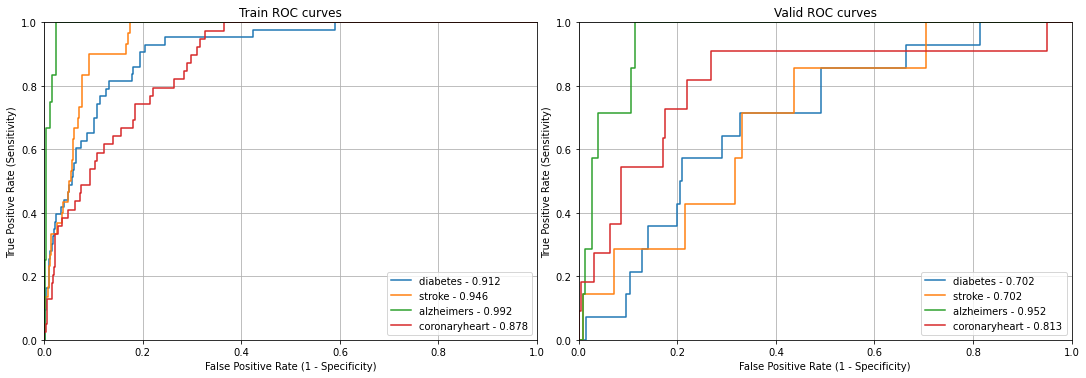

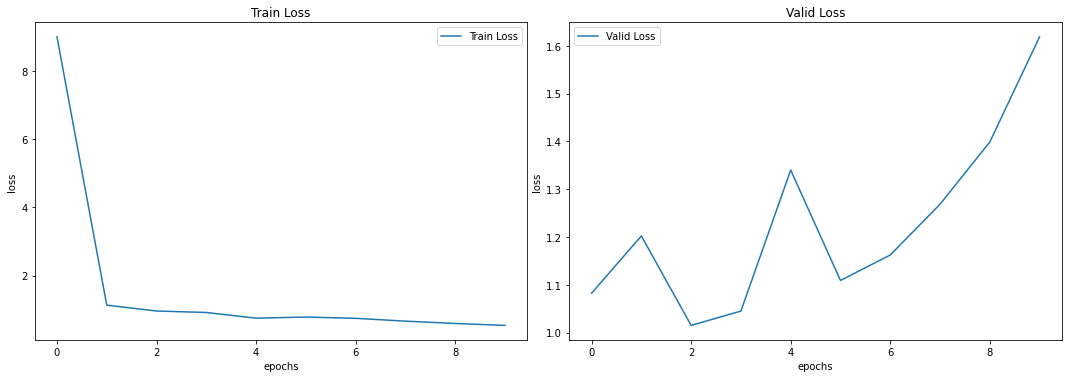

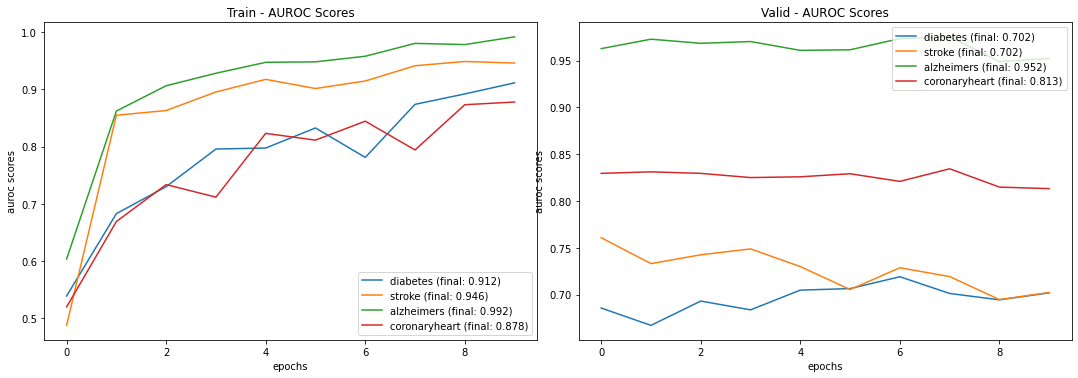

In [ ]:
lstm_base.fit(10, verbosity=.5)

Load the saved experiment run again + load model from checkpoint ..

In [ ]:
lstm_base_exp = Experiment.load('lstm_base')

Loaded experiment from /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


From "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          0.516 | [0.944 0.955 0.964 0.899]              2.162 | [0.685 0.713 0.982 0.807]
   12 |          0.423 | [0.946 0.969 0.987 0.926]              2.437 | [0.698 0.695 0.970 0.809]
   14 |          0.380 | [0.957 0.965 0.989 0.950]              2.623 | [0.683 0.686 0.964 0.790]
Checkpointed to "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


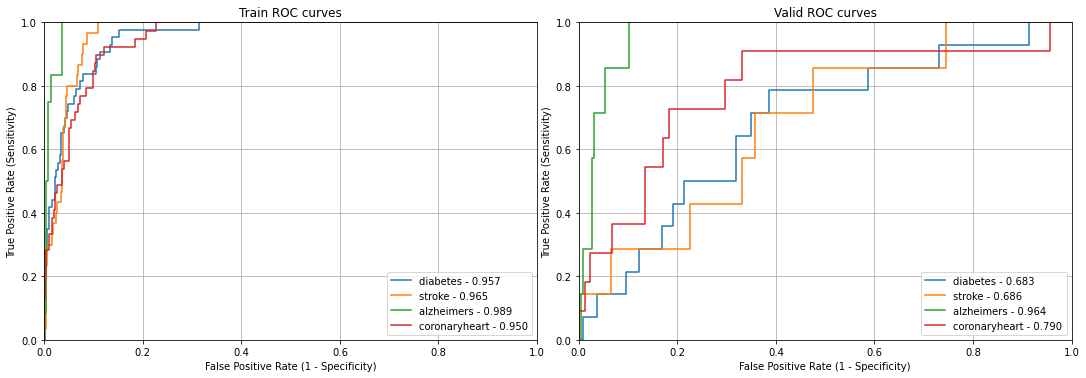

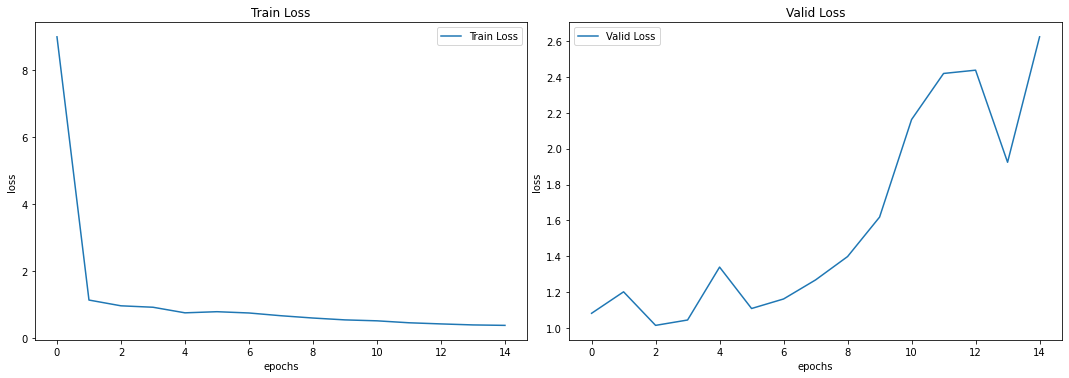

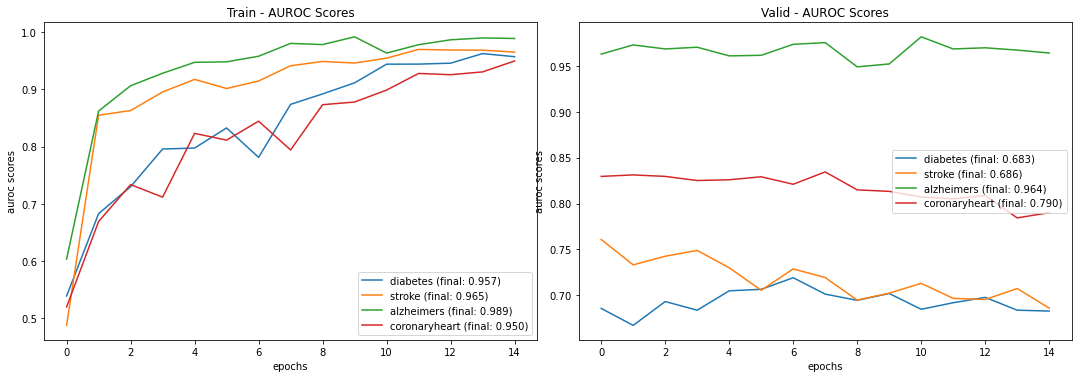

In [ ]:
lstm_base.fit(5, from_checkpoint=True)

Run predict on the test dataset

From "/home/vinod/.lemonade/models/lstm_base/checkpoint.tar", loading model ...
test loss = 1.6034605503082275
test aurocs = [0.720517 0.908279 0.870451 0.78612 ]

Prediction Summary ...
               auroc_score  optimal_threshold     auroc_95_ci
diabetes          0.720517           0.027029  (0.623, 0.801)
stroke            0.908279           0.645103  (0.835, 0.964)
alzheimers        0.870451           0.126945   (0.76, 0.957)
coronaryheart     0.786120           0.238321   (0.71, 0.862)
Saved experiment to /home/vinod/.lemonade/experiments/lstm_base/lstm_base.experiment


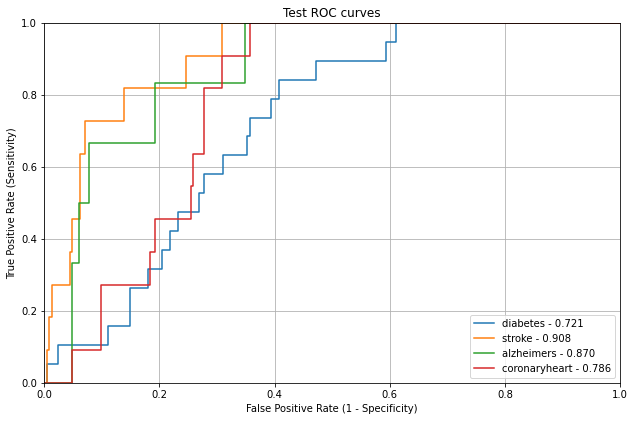

In [ ]:
lstm_base.predict()

## CNN

In [ ]:
cnn_base = Experiment.create_from_file(EXPERIMENT_STORE, 'cnn_base')

In [ ]:
cnn_base

Experiment name: cnn_base
Description: Baseline settings for EHR_CNN experiments
Path: /home/vinod/.lemonade/experiments/cnn_base
Labels: ['diabetes', 'stroke', 'alzheimers', 'coronaryheart']
Dataset: /home/vinod/.lemonade/datasets/synthea/1K
Model: CNN
Optim: Adagrad

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |          4.626 | [0.583 0.528 0.675 0.518]             35.393 | [0.437 0.376 0.106 0.409]
    9 |          0.977 | [0.797 0.838 0.862 0.771]              1.246 | [0.646 0.739 0.967 0.773]
Checkpointed to "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/cnn_base/cnn_base.experiment


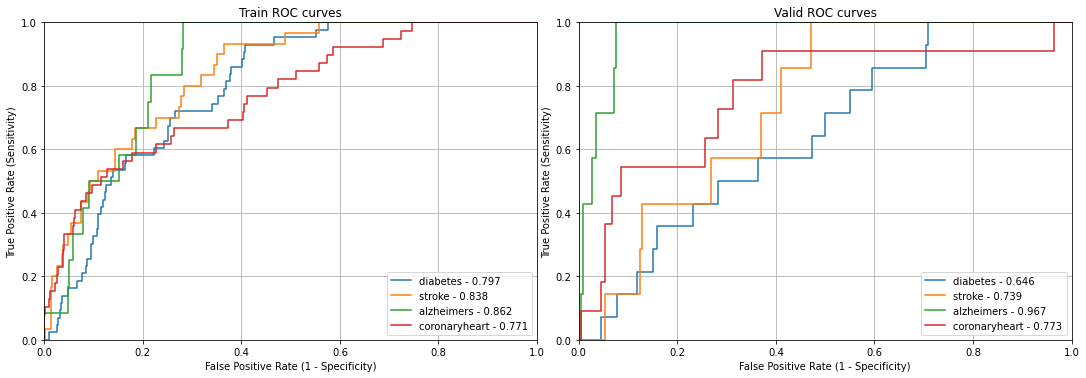

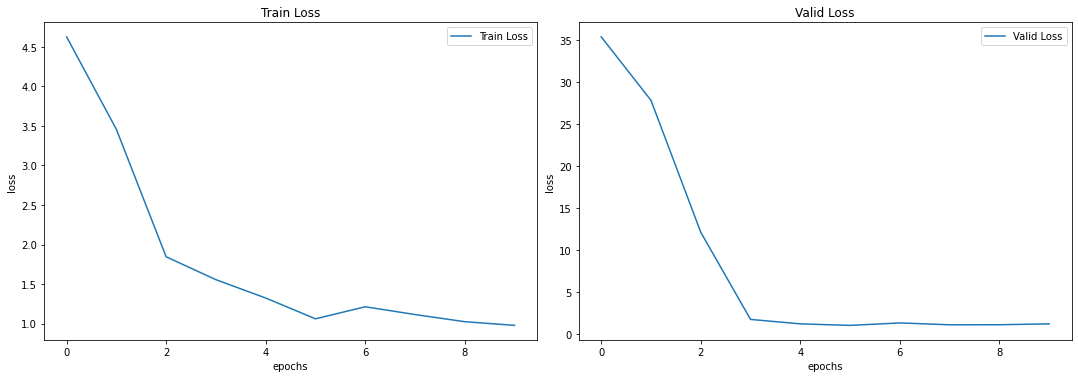

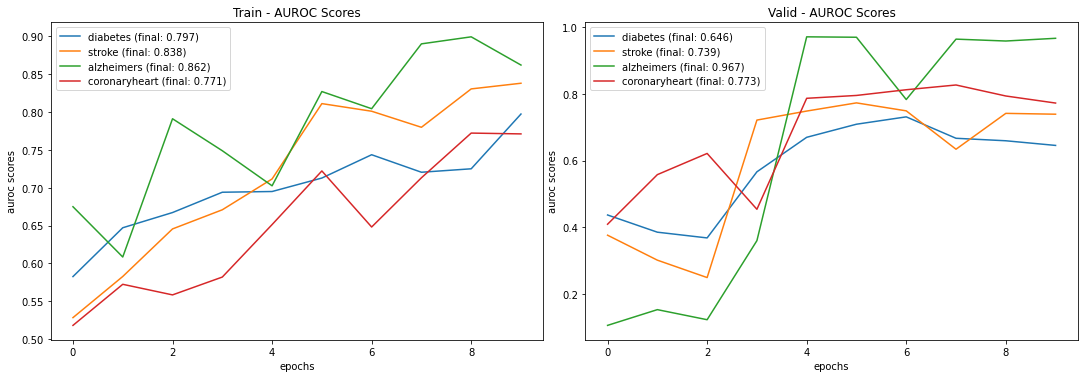

In [ ]:
cnn_base.fit(10, verbosity=.25)

From "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          0.924 | [0.780 0.798 0.909 0.799]              1.159 | [0.646 0.758 0.962 0.792]
   12 |          0.870 | [0.795 0.862 0.913 0.857]              1.311 | [0.651 0.768 0.956 0.791]
   14 |          0.834 | [0.805 0.882 0.907 0.916]              1.848 | [0.709 0.802 0.968 0.810]
Checkpointed to "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonade/experiments/cnn_base/cnn_base.experiment


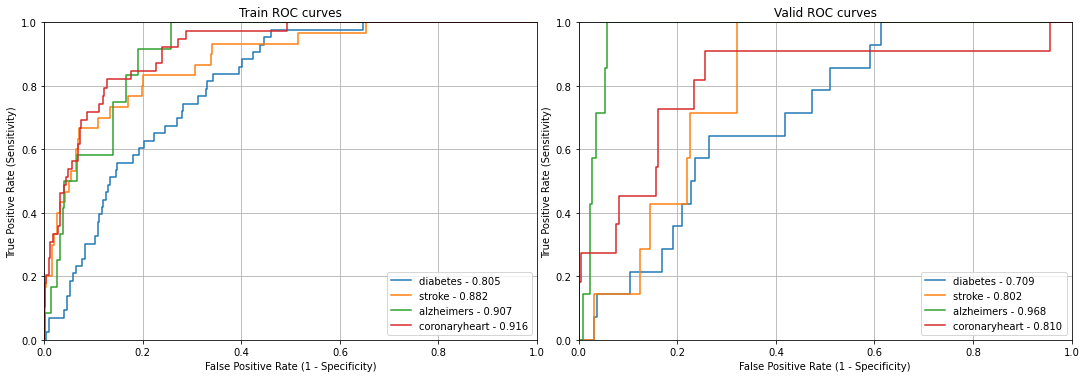

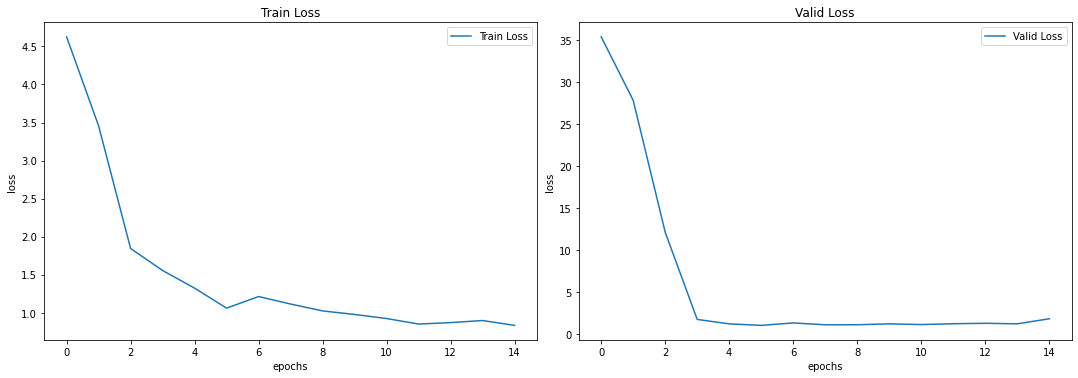

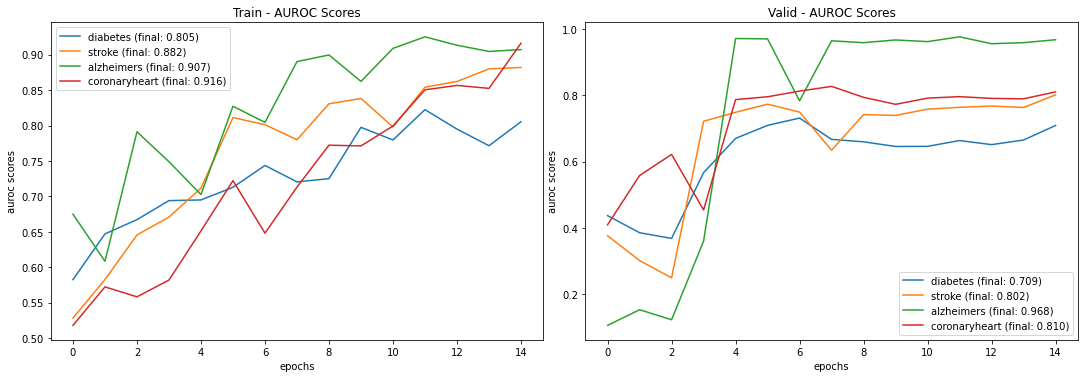

In [ ]:
cnn_base.fit(5, from_checkpoint=True)

From "/home/vinod/.lemonade/models/cnn_base/checkpoint.tar", loading model ...
test loss = 1.6314605474472046
test aurocs = [0.718567 0.914773 0.887191 0.768263]

Prediction Summary ...
               auroc_score  optimal_threshold     auroc_95_ci
diabetes          0.718567           0.736008  (0.608, 0.816)
stroke            0.914773           0.983249  (0.852, 0.963)
alzheimers        0.887191           0.989982  (0.797, 0.968)
coronaryheart     0.768263           0.364905   (0.62, 0.893)
Saved experiment to /home/vinod/.lemonade/experiments/cnn_base/cnn_base.experiment


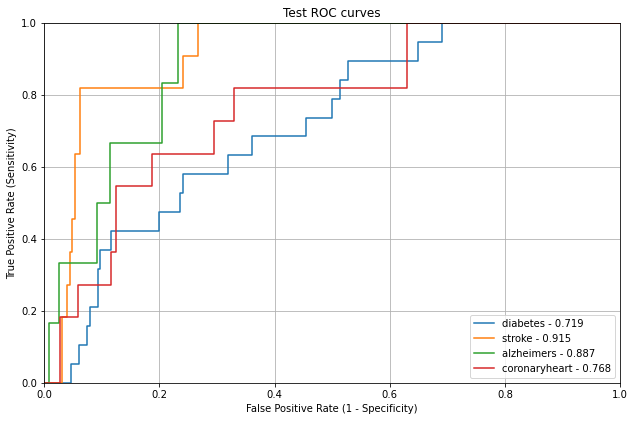

In [ ]:
cnn_base.predict()